In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
!pwd

/content


In [13]:
!ls

gdrive	sample_data


In [9]:
import pandas as pd

In [10]:
#df = pd.read_csv("C:/Users/andrewsr/Downloads/iris.csv")

df = pd.read_csv('gdrive/My Drive/Colab Notebooks/irishdata/iris.csv')

In [ ]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df["variety"].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
variety         0
dtype: int64

In [16]:
df.corr(method='pearson', numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


X_scaled type is <class 'numpy.ndarray'>


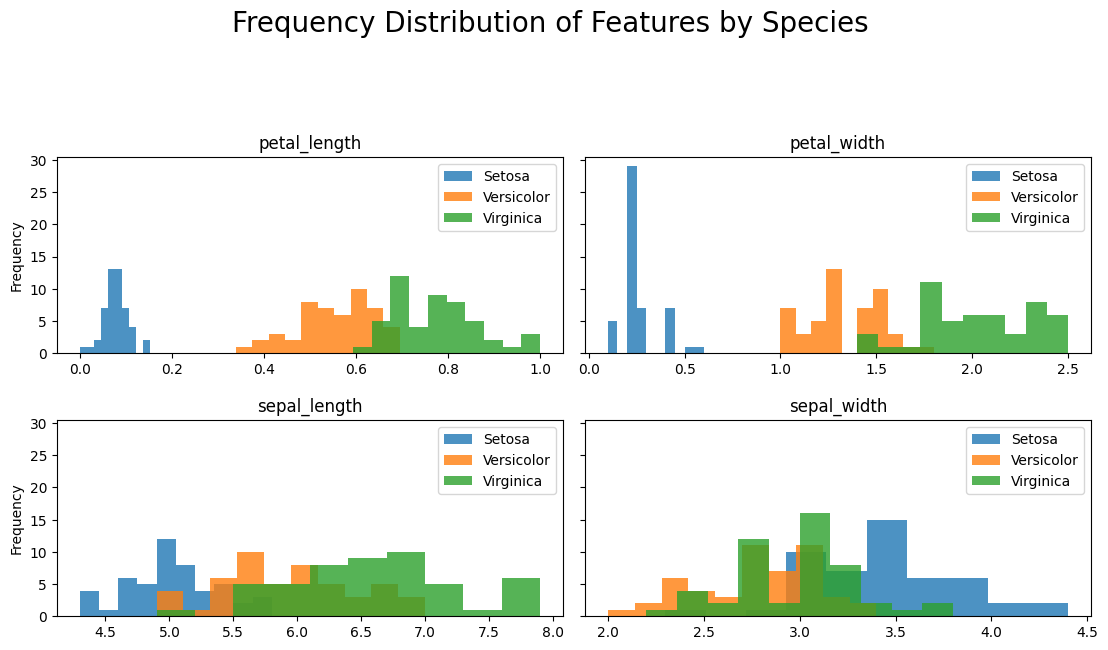

In [ ]:
# Although not essential for this dataset let's see if scaling provides additional insights.
import matplotlib.pyplot as plt

X = df.drop(['variety'], axis=1)
Y = df['variety']

# Scale inputs to range 0..1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print('X_scaled type is',type(X_scaled))

# As output of scaler is np array I'll transform back to df for easier exploration and plotting
X_scaled_df = pd.DataFrame(X_scaled,columns=['sepal_length','sepal_width',
                                             'petal_length','petal_width'])
df_out = pd.concat([X_scaled_df,Y],axis=1)

# Notice x-axis on subplots are all the same for all features (0 to 1) after scaling.
fig = plt.figure(figsize=(12,7))
fig.suptitle('Frequency Distribution of Features by Species ',fontsize=20)

ax1 = fig.add_subplot(221)
df_out.groupby("variety").petal_length.plot(kind='hist',alpha=0.8,legend=True,title='petal_length')
ax2 = fig.add_subplot(222,sharey=ax1)
df.groupby("variety").petal_width.plot(kind='hist',alpha=0.8,legend=True,title='petal_width')
ax3 = fig.add_subplot(223,sharey=ax1)
df.groupby("variety").sepal_length.plot(kind='hist',alpha=0.8,legend=True,title='sepal_length')
ax4 = fig.add_subplot(224,sharey=ax1)
df.groupby("variety").sepal_width.plot(kind='hist',alpha=0.8,legend=True,title='sepal_width')

plt.tight_layout(pad=4, w_pad=1, h_pad=1.5)
plt.show()

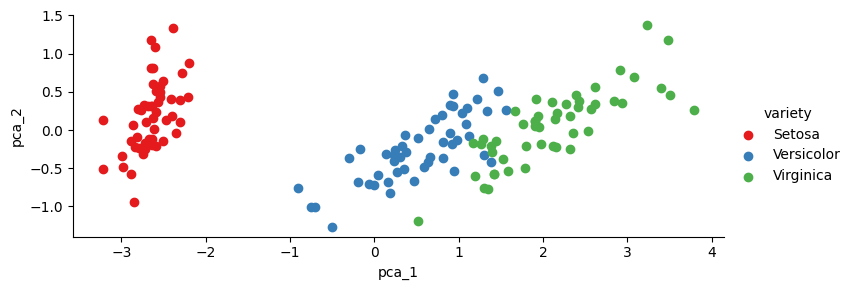

In [ ]:
# Another useful visualization during exploration is a 2D PCA plot.
# It can quickly indicate how easy or difficult the classification problem is.
# This is particularly relevant for high-dimensional datasets.

from sklearn.decomposition import PCA
# spliting input and target
#X = iris.drop('Species',1)
#Y = iris.Species

pca = PCA(n_components=2).fit_transform(X) # pca output is an array
pca_df = pd.DataFrame(pca,columns=['pca_1','pca_2']) # transforming back to df
pca_Y = pd.concat([pca_df, Y],axis=1)

# The 3 species cluster nicely which is a good indication a classifier can be trained
# at high accuracy.
# It is also expected that accuracy of identifying setosa will be higher.

import matplotlib.pyplot as plt
import seaborn as sns
sns.FacetGrid(pca_Y, hue="variety", palette="Set1", aspect=2.5).map(plt.scatter, "pca_1", "pca_2").add_legend()
plt.show()

In [ ]:
# now we test whether the dataset can be accurately classified by a learner trained on the real data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df[['variety']]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# import numpy as np

# # Create a list of numbers
# data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# # Shuffle the list with a random seed of 42
# np.random.seed(42)
# shuffled_data_1 = np.random.permutation(data)

# # Shuffle the list with a different random seed
# np.random.seed(10)
# shuffled_data_2 = np.random.permutation(data)

# # Print the shuffled lists
# print("Shuffled data with random_state=42:", shuffled_data_1)
# print("Shuffled data with random_state=10:", shuffled_data_2)

In [ ]:
# Instantiate individual classifiers
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [ ]:
# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('dt', decision_tree), ('knn', knn)], voting='hard')

In [ ]:
# Fit the ensemble model to the training data
ensemble_model.fit(X_train, y_train.values.ravel())

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())])

In [ ]:
# Make predictions on the test data
y_pred = ensemble_model.predict(X_test)

In [ ]:
# Calculate accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", accuracy)

Ensemble Model Accuracy: 1.0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)

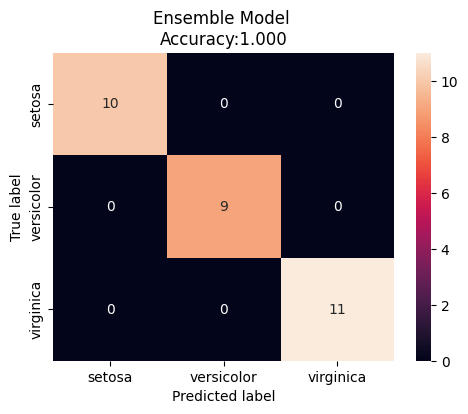

In [ ]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'],
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Ensemble Model \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# now try some other classifiers
# Bagging classifier using Decision Tree as the base estimator
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
# Fit the models on the training data
bagging_model.fit(X_train, y_train.values.ravel())
random_forest_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
bagging_pred = bagging_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)

In [ ]:
# Calculate accuracy for both models
bagging_accuracy = accuracy_score(y_test, bagging_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)

print("Bagging Model Accuracy:", bagging_accuracy)
print("Random Forest Model Accuracy:", random_forest_accuracy)

Bagging Model Accuracy: 1.0
Random Forest Model Accuracy: 1.0


In [ ]:
# now try some boosting approaches
# AdaBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Gradient Boosting classifier
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# XGBoost classifier
xgboost_model = XGBClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fit the models on the training data
adaboost_model.fit(X_train, y_train.values.ravel())
gradient_boosting_model.fit(X_train, y_train.values.ravel())

#oops xgboost expects numeric target values
#xgboost_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
adaboost_pred = adaboost_model.predict(X_test)
gradient_boosting_pred = gradient_boosting_model.predict(X_test)

#xgboost_pred = xgboost_model.predict(X_test)

In [ ]:
# Calculate accuracy for each model
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_pred)
#xgboost_accuracy = accuracy_score(y_test, xgboost_pred)

print("AdaBoost Model Accuracy:", adaboost_accuracy)
print("Gradient Boosting Model Accuracy:", gradient_boosting_accuracy)
#print("XGBoost Model Accuracy:", xgboost_accuracy)

AdaBoost Model Accuracy: 1.0
Gradient Boosting Model Accuracy: 1.0
